# PCA for Bag of Words, Models

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score

In [68]:
df = pd.read_csv('bow_filtered.csv')  
stockprice = pd.read_csv("returns_modeling.csv")
df.head() # 42 data points, 422 words
df
stockprice

,Ticker,Year,Adj_Return,SP500_Return,Excess_Return
0,ADM,2010,-0.019293,0.151,-0.170293
1,BGS,2010,0.587649,0.151,0.436649
2,CAG,2010,0.014899,0.151,-0.136101
3,CPB,2010,0.061094,0.151,-0.089906
4,DAR,2010,0.584726,0.151,0.433726
...,...,...,...,...,...
188,SJM,2020,0.145390,0.184,-0.038610
189,THS,2020,-0.123918,0.184,-0.307918
190,TR,2020,-0.120226,0.184,-0.304226
191,TSN,2020,-0.273293,0.184,-0.457293


Scaling each feature

In [69]:
#Label created 
ticket_year_2_price = {}
for i, row in stockprice.iterrows():
    #print(row['Ticker'])
    #print(row['Year'])
    key = row['Ticker'] + str(row['Year'])
    value = 1 if row['Excess_Return'] > 0 else 0
    ticket_year_2_price[key] = value
print(ticket_year_2_price)
    

{'ADM2010': 0, 'BGS2010': 1, 'CAG2010': 0, 'CPB2010': 0, 'DAR2010': 1, 'FLO2010': 1, 'GIS2010': 1, 'INGR2010': 1, 'K2010': 0, 'MKC2010': 1, 'SJM2010': 0, 'THS2010': 1, 'TR2010': 0, 'TSN2010': 1, 'HSY2010': 1, 'ADM2011': 0, 'BGS2011': 1, 'CAG2011': 1, 'CPB2011': 0, 'DAR2011': 0, 'FLO2011': 1, 'GIS2011': 1, 'INGR2011': 1, 'K2011': 1, 'MKC2011': 1, 'SJM2011': 1, 'THS2011': 1, 'TR2011': 0, 'TSN2011': 1, 'HSY2011': 1, 'ADM2012': 0, 'ANFI2012': 0, 'BGS2012': 1, 'CAG2012': 0, 'CPB2012': 0, 'DAR2012': 1, 'FLO2012': 1, 'GIS2012': 1, 'INGR2012': 1, 'K2012': 0, 'MKC2012': 1, 'POST2012': 0, 'SJM2012': 0, 'THS2012': 0, 'TR2012': 1, 'TSN2012': 0, 'HSY2012': 1, 'ADM2013': 1, 'ANFI2013': 1, 'BGS2013': 0, 'CAG2013': 0, 'CPB2013': 0, 'DAR2013': 0, 'FLO2013': 1, 'GIS2013': 1, 'INGR2013': 0, 'K2013': 0, 'MKC2013': 0, 'POST2013': 1, 'SJM2013': 0, 'THS2013': 0, 'TR2013': 0, 'TSN2013': 1, 'HSY2013': 1, 'ADM2014': 1, 'ANFI2014': 0, 'BGS2014': 0, 'CAG2014': 0, 'CPB2014': 0, 'DAR2014': 0, 'FLO2014': 0, 'GIS2014

In [70]:
labels = []
for i, row in df.iterrows():
    key = row['Ticket'] + str(row['Year']+1)
    print(key)
    if key not in ticket_year_2_price: #defaulting to 1 if there is not data
        labels.append(1)
    else:
        labels.append(ticket_year_2_price[key])

ADM2013
ADM2016
ADM2019
BGS2013
BGS2016
BGS2019
CAG2013
CAG2016
CAG2019
CPB2013
CPB2016
CPB2019
GIS2013
GIS2016
GIS2019
HSY2013
HSY2016
HSY2019
INGR2013
INGR2016
INGR2019
K2013
K2016
K2019
MKC2013
MKC2016
MKC2019
NOMD2019
POST2013
POST2016
POST2019
SJM2013
SJM2016
SJM2019
THS2013
THS2016
THS2019
TR2013
TR2016
TR2019


In [71]:
#df['labels'] = labels

In [72]:
df

,Ticket,Year,accountants,accounting,acquire,acquired,acquirers,acquiring,acquisition,acquisitions,...,virus,viruses,wage,wages,warming,wholesale,wholesalers,worker,workers,workforce
0,ADM,2012,0.000000,0.004717,0.000000,0.000000,0.000000,0.000000,0.004717,0.004717,...,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.004717
1,ADM,2015,0.000000,0.003717,0.000000,0.000000,0.000000,0.000000,0.011152,0.003717,...,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.003717
2,ADM,2018,0.000000,0.002950,0.000000,0.002950,0.002950,0.000000,0.017699,0.008850,...,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.002950
3,BGS,2012,0.000000,0.001536,0.006144,0.006144,0.000000,0.000000,0.004608,0.023041,...,0,0.000000,0.004608,0,0,0.001536,0.004608,0.000000,0.000000,0.001536
4,BGS,2015,0.000000,0.001259,0.005038,0.008816,0.000000,0.000000,0.007557,0.018892,...,0,0.001259,0.002519,0,0,0.001259,0.003778,0.000000,0.000000,0.001259
5,BGS,2018,0.000000,0.001200,0.004802,0.006002,0.000000,0.000000,0.006002,0.019208,...,0,0.002401,0.002401,0,0,0.001200,0.003601,0.000000,0.000000,0.001200
6,CAG,2012,0.000000,0.007407,0.000000,0.014815,0.000000,0.000000,0.007407,0.014815,...,0,0.000000,0.003704,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
7,CAG,2015,0.000000,0.003810,0.000000,0.013333,0.000000,0.000000,0.009524,0.013333,...,0,0.000000,0.001905,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
8,CAG,2018,0.000000,0.004932,0.003699,0.011097,0.000000,0.000000,0.035758,0.011097,...,0,0.001233,0.001233,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
9,CPB,2012,0.000000,0.014151,0.000000,0.014151,0.000000,0.000000,0.014151,0.023585,...,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [73]:
X = df.values[:,1:]
X.shape

(40, 423)

In [74]:
#code for cell 74 created by Erik Mangusson 
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [75]:
X

array([[-1.24816826, -0.22559678, -0.12690166, ..., -0.27921213,
        -0.16012815,  1.87969155],
       [-0.03044313, -0.22559678, -0.23513399, ..., -0.27921213,
        -0.16012815,  1.36603222],
       [ 1.187282  , -0.22559678, -0.318256  , ..., -0.27921213,
        -0.16012815,  0.97154387],
       ...,
       [-1.24816826, -0.22559678, -0.63768231, ..., -0.27921213,
        -0.16012815, -0.54441997],
       [-0.03044313, -0.22559678,  0.0939765 , ..., -0.27921213,
        -0.16012815, -0.54441997],
       [ 1.187282  , -0.22559678, -0.0081155 , ..., -0.27921213,
        -0.16012815, -0.54441997]])

In [76]:
#PCA created, 5 Components. (manually changed to 3 components to run classifiers)
#code for cell 76 created by Erik Mangusson 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_components = pca.fit_transform(X)
pca_components.shape

(40, 5)

In [77]:
#extracting 2 components out of 3 for classification later 
pca_components_2d = pca_components[:, 0:2]

In [78]:
print('Explained variation per principal component:')
print(pca.explained_variance_ratio_)

Explained variation per principal component:
[0.08598125 0.07453555 0.07181208 0.06290548 0.06204305]


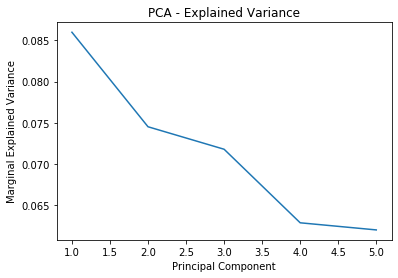

In [79]:
#code for cell 79 created by Erik Mangusson 
plt.plot(np.arange(1,6,1), pca.explained_variance_ratio_)
plt.title('PCA - Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Marginal Explained Variance')
plt.show()

In [80]:
PCA_components = pd.DataFrame(pca_components)
PCA_components

,0,1,2,3,4
0,-4.894183,-3.055545,8.786581,9.443165,-2.695328
1,-3.623951,-3.650326,10.035183,12.114555,-3.630227
2,-2.776597,-5.592108,11.416545,13.938008,-4.972261
3,4.773237,7.041948,-5.729954,4.299645,0.918569
4,4.588501,5.910169,-5.192390,3.996391,0.806586
5,5.166834,5.608245,-5.533183,4.726578,0.883631
6,-1.146268,-3.971315,0.201814,-1.454271,-0.418450
7,1.313556,-3.993647,-2.558069,-1.230856,-1.043863
8,2.640861,-2.344640,-2.156477,-0.564818,-1.664955
9,-0.869969,-5.081720,-1.559077,-3.231518,-0.675339


In [81]:
#labelling "Ticket"
label_encoder = LabelEncoder()
label_encoder.fit(df.Ticket)
ticket_labels = label_encoder.transform(df.Ticket)
ticket_labels

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9, 10, 10, 10, 11, 11, 11,
       12, 12, 12, 13, 13, 13])

In [82]:
df['Ticket'] = ticket_labels
#df

In [83]:
#testing the dataset. Not used in the report. 
X_train, X_test, Y_train, Y_test = train_test_split(df, labels, test_size = 0.30)

In [84]:
#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
score = naive_bayes.score(X_test, Y_test)
print(score)
naive_bayes_predict = naive_bayes.predict(X_test)
naive_bayes_confusion_matrix = confusion_matrix(Y_test, naive_bayes_predict)
print("Confusion Matrix for Naive Bayes\n", naive_bayes_confusion_matrix)

0.6666666666666666
Confusion Matrix for Naive Bayes
 [[5 3]
 [1 3]]


In [85]:
#KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
score = KNN.score(X_test, Y_test)
knn_predict = KNN.predict(X_test)
knn_confusion_matrix = confusion_matrix(Y_test, knn_predict)
print(score)
print("Confusion Matrix for KNN\n", knn_confusion_matrix)

0.6666666666666666
Confusion Matrix for KNN
 [[5 3]
 [1 3]]


In [86]:
#Logistic Regression 

In [87]:
log_regression = LogisticRegression()
log_regression.fit(X_train, Y_train)
score = log_regression.score(X_test, Y_test)
print(score)
log_regressions_predict = log_regression.predict(X_test)
log_regressions_confusion_matrix = confusion_matrix(Y_test, log_regressions_predict)
print("Confusion Matrix for Log Regression\n", log_regressions_confusion_matrix)

0.6666666666666666
Confusion Matrix for Log Regression
 [[4 4]
 [0 4]]


C:\Users\matpo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
#Linear SVM
linear_SVM = SVC(kernel = 'linear')
linear_SVM.fit(X_train, Y_train)
score = linear_SVM.score(X_test, Y_test)
print(score)
linear_SVM_predict = linear_SVM.predict(X_test)
linear_SVM_confusion_matrix = confusion_matrix(Y_test, linear_SVM_predict)
print("Confusion Matrix for Linear SVM\n", linear_SVM_confusion_matrix)

0.5833333333333334
Confusion Matrix for Linear SVM
 [[3 5]
 [0 4]]


In [89]:
#
rbf_SVM = SVC(kernel = 'rbf')
rbf_SVM.fit(X_train, Y_train)
score = rbf_SVM.score(X_test, Y_test)
print(score)
rbf_SVM_predict = rbf_SVM.predict(X_test)
rbf_SVM_confusion_matrix = confusion_matrix(Y_test, rbf_SVM_predict)
print("Confusion Matrix for RBF SVM\n", rbf_SVM_confusion_matrix)

0.6666666666666666
Confusion Matrix for RBF SVM
 [[4 4]
 [0 4]]


C:\Users\matpo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [90]:
#testing the PCA. 5 components currenty. Manualy changed for 2
X_train, X_test, Y_train, Y_test = train_test_split(pca_components, labels, test_size = 0.30)

In [91]:
#Naive Bayes
naive_bayes_PCA = GaussianNB()
naive_bayes_PCA.fit(X_train, Y_train)
score = naive_bayes_PCA.score(X_test, Y_test)
naive_bayes_PCA_predict = naive_bayes_PCA.predict(X_test)
naive_bayes_confusion_matrix = confusion_matrix(Y_test, naive_bayes_PCA_predict)
naive_bayes_f1_score = f1_score(Y_test, naive_bayes_PCA_predict, average = None)
naive_bayes_recall_score = recall_score(Y_test, naive_bayes_PCA_predict, average = None)
naive_bayes_precision_score = precision_score(Y_test, naive_bayes_PCA_predict, average = None)
print("Confusion Matrix for Naive Bayes\n", naive_bayes_confusion_matrix)
print(score)
print("Recall Scores", naive_bayes_recall_score)
print("Precision Scores", naive_bayes_precision_score)
print("F1 scores are\n", naive_bayes_f1_score)

Confusion Matrix for Naive Bayes
 [[3 2]
 [5 2]]
0.4166666666666667
Recall Scores [0.6        0.28571429]
Precision Scores [0.375 0.5  ]
F1 scores are
 [0.46153846 0.36363636]


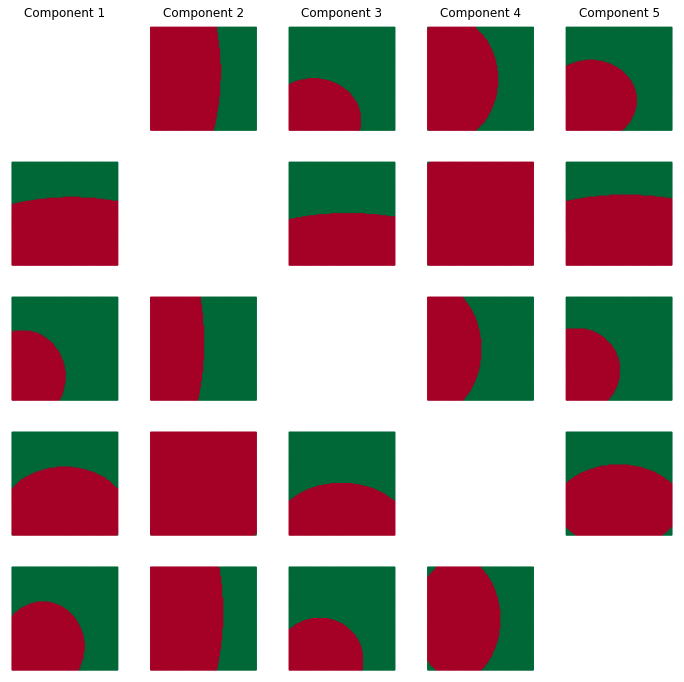

In [96]:
######################################
## New code to create graphs 
## of note: Decision Boundaries graph code used in cells 96, 98, 100, 102 developed by Jos Vilier
######################################

grid_size = 100 # increase to make smoother graphs, but costs additional computing power
grid_size_sq = grid_size**2

min_vals = list(PCA_components.min()) # axis lower bound
max_vals = list(PCA_components.max()) # axis upper bound
mean_vals = [0.0, 0.0, 0.0, 0.0, 0.0] # mean is zero (result of PCA)

base_grid = np.repeat(mean_vals,grid_size_sq,axis = 0).reshape(grid_size_sq,5) # create base grid that will be adjusted for each graph

cols = ['Component {}'.format(col) for col in range(1, 6)] # column titles
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12)) # 5 by 5 subplots (for each component)

for ax, col in zip(axes[0], cols):
    ax.set_title(col) # add column titles

for i in range(5):
    for j in range(5):
        axes[i,j].axis('off') # turn off all axes
        if i == j:
            continue
        x_grid = np.linspace(min_vals[i], max_vals[i],grid_size) # linspace for x axis
        y_grid = np.linspace(min_vals[j], max_vals[j],grid_size) # linspace for y axis
        x_grid, y_grid = np.meshgrid(x_grid,y_grid) # combine into meshgrid (size grid_size^2)
        x_flat = x_grid.flatten()
        y_flat = y_grid.flatten()
        
        new_grid = base_grid.copy() # start with base grid (all 0's)
        new_grid[:,i] = x_flat # overwrite x axis values
        new_grid[:,j] = y_flat # overwrite y axis values
 
        pred = naive_bayes_PCA.predict(new_grid) # get prediction for new grid
        axes[i,j].scatter(new_grid[:,i],new_grid[:,j],c = pred, s = 1, cmap = "RdYlGn") # make scatterplot, color according to predicted label
        
plt.savefig("Naive_bayes_classification.png") # save graph
plt.show()

In [97]:
#KNN
KNN_PCA = KNeighborsClassifier()
KNN_PCA.fit(X_train, Y_train)
score = KNN_PCA.score(X_test, Y_test)
KNN_PCA_predict = KNN_PCA.predict(X_test)
KNN_PCA_confusion_matrix = confusion_matrix(Y_test, KNN_PCA_predict)
KNN_PCA_f1_score = f1_score(Y_test, KNN_PCA_predict, average = None)
KNN_PCA_recall_score = recall_score(Y_test, KNN_PCA_predict, average = None)
KNN_PCA_precision_score = precision_score(Y_test, KNN_PCA_predict, average = None)
print("Confusion Matrix for KNN\n", KNN_PCA_confusion_matrix)
print(score)
print("Recall Scores", KNN_PCA_recall_score)
print("Precision Scores", KNN_PCA_precision_score)
print("F1 scores are\n", KNN_PCA_f1_score)

Confusion Matrix for KNN
 [[4 1]
 [6 1]]
0.4166666666666667
Recall Scores [0.8        0.14285714]
Precision Scores [0.4 0.5]
F1 scores are
 [0.53333333 0.22222222]


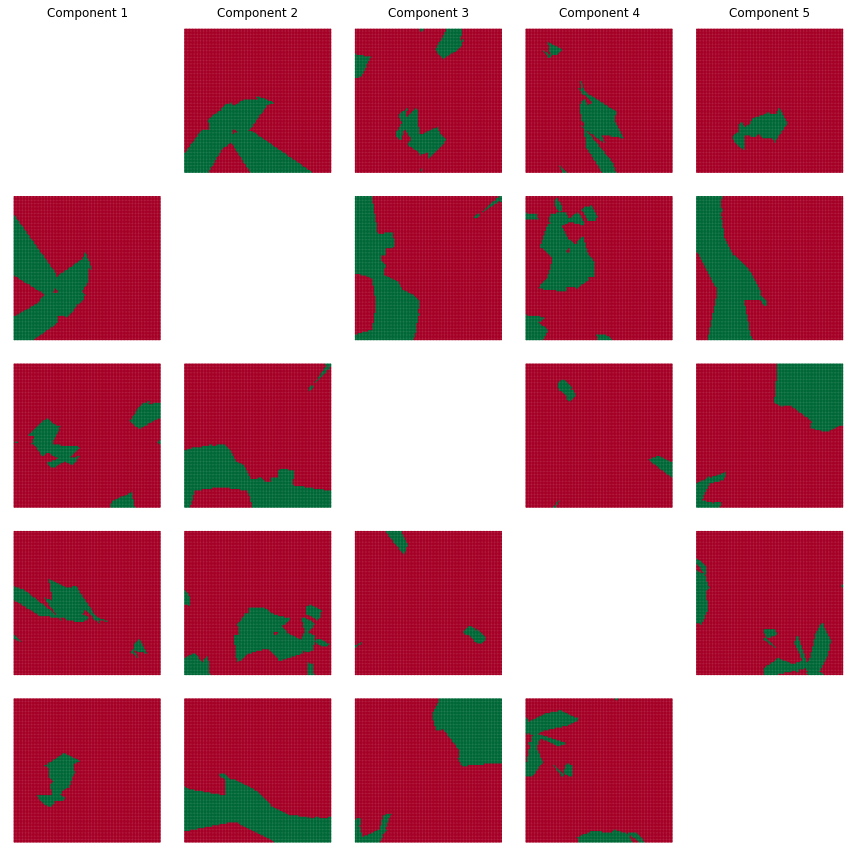

In [98]:
grid_size = 100 # increase to make smoother graphs, but costs additional computing power
grid_size_sq = grid_size**2

min_vals = list(PCA_components.min()) # axis lower bound
max_vals = list(PCA_components.max()) # axis upper bound
mean_vals = [0.0, 0.0, 0.0, 0.0, 0.0] # mean is zero (result of PCA)

base_grid = np.repeat(mean_vals,grid_size_sq,axis = 0).reshape(grid_size_sq,5) # create base grid that will be adjusted for each graph

cols = ['Component {}'.format(col) for col in range(1, 6)] # column titles
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12)) # 5 by 5 subplots (for each component)

for ax, col in zip(axes[0], cols):
    ax.set_title(col) # add column titles

for i in range(5):
    for j in range(5):
        axes[i,j].axis('off') # turn off all axes
        if i == j:
            continue
        x_grid = np.linspace(min_vals[i], max_vals[i],grid_size) # linspace for x axis
        y_grid = np.linspace(min_vals[j], max_vals[j],grid_size) # linspace for y axis
        x_grid, y_grid = np.meshgrid(x_grid,y_grid) # combine into meshgrid (size grid_size^2)
        x_flat = x_grid.flatten()
        y_flat = y_grid.flatten()
        
        new_grid = base_grid.copy() # start with base grid (all 0's)
        new_grid[:,i] = x_flat # overwrite x axis values
        new_grid[:,j] = y_flat # overwrite y axis values
 
        pred = KNN_PCA.predict(new_grid) # get prediction for new grid
        axes[i,j].scatter(new_grid[:,i],new_grid[:,j],c = pred, s = 1, cmap = "RdYlGn") # make scatterplot, color according to predicted label
        
plt.tight_layout()
plt.savefig("KNN_classification.png") # save graph
plt.show()

In [99]:
#Logistic Regression 
log_regression_PCA = LogisticRegression()
log_regression_PCA.fit(X_train, Y_train)
score = log_regression_PCA.score(X_test, Y_test)
print(score)
log_regression_predict = log_regression_PCA.predict(X_test)
log_regression_confusion_matrix = confusion_matrix(Y_test, log_regression_predict)
log_regression_f1_score = f1_score(Y_test, log_regression_predict, average = None)
log_regression_recall_score = recall_score(Y_test, log_regression_predict, average = None)
log_regression_precision_score = precision_score(Y_test, log_regression_predict, average = None)
print("Confusion Matrix for Logistic Regression\n", log_regression_confusion_matrix)
print(score)
print("Recall Scores", log_regression_recall_score)
print("Precision Scores", log_regression_precision_score)
print("F1 scores are\n", log_regression_f1_score)

0.5
Confusion Matrix for Logistic Regression
 [[3 2]
 [4 3]]
0.5
Recall Scores [0.6        0.42857143]
Precision Scores [0.42857143 0.6       ]
F1 scores are
 [0.5 0.5]


C:\Users\matpo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


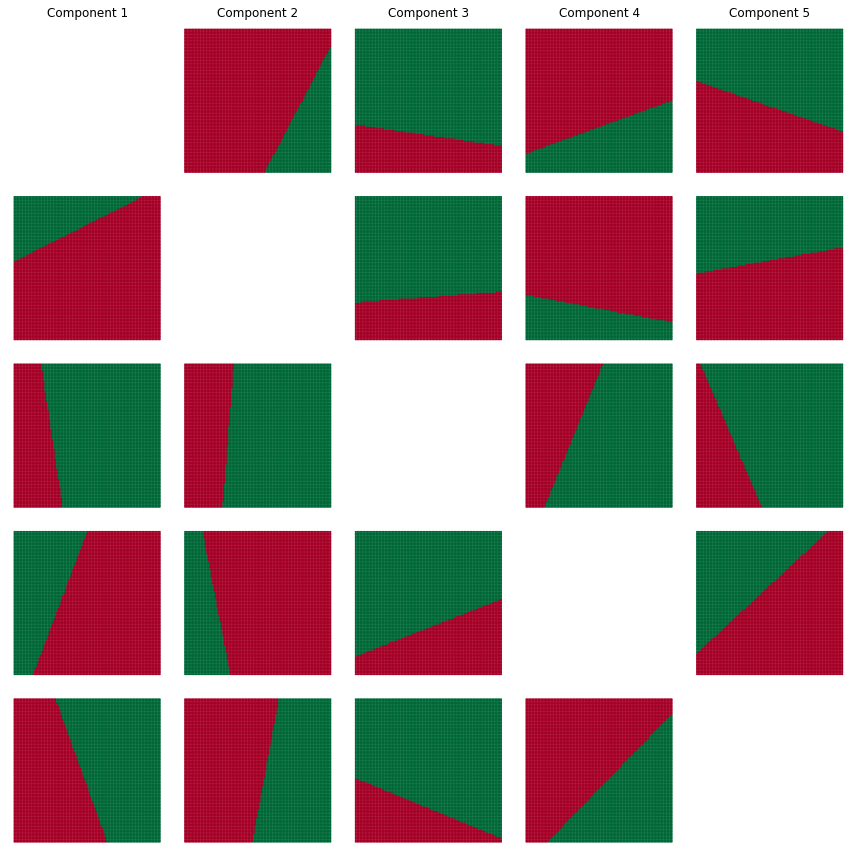

In [100]:
grid_size = 100 # increase to make smoother graphs, but costs additional computing power
grid_size_sq = grid_size**2

min_vals = list(PCA_components.min()) # axis lower bound
max_vals = list(PCA_components.max()) # axis upper bound
mean_vals = [0.0, 0.0, 0.0, 0.0, 0.0] # mean is zero (result of PCA)

base_grid = np.repeat(mean_vals,grid_size_sq,axis = 0).reshape(grid_size_sq,5) # create base grid that will be adjusted for each graph

cols = ['Component {}'.format(col) for col in range(1, 6)] # column titles
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12)) # 5 by 5 subplots (for each component)

for ax, col in zip(axes[0], cols):
    ax.set_title(col) # add column titles

for i in range(5):
    for j in range(5):
        axes[i,j].axis('off') # turn off all axes
        if i == j:
            continue
        x_grid = np.linspace(min_vals[i], max_vals[i],grid_size) # linspace for x axis
        y_grid = np.linspace(min_vals[j], max_vals[j],grid_size) # linspace for y axis
        x_grid, y_grid = np.meshgrid(x_grid,y_grid) # combine into meshgrid (size grid_size^2)
        x_flat = x_grid.flatten()
        y_flat = y_grid.flatten()
        
        new_grid = base_grid.copy() # start with base grid (all 0's)
        new_grid[:,i] = x_flat # overwrite x axis values
        new_grid[:,j] = y_flat # overwrite y axis values
 
        pred = log_regression_PCA.predict(new_grid) # get prediction for new grid
        axes[i,j].scatter(new_grid[:,i],new_grid[:,j],c = pred, s = 1, cmap = "RdYlGn") # make scatterplot, color according to predicted label
        
plt.tight_layout()
plt.savefig("log_regression_classification.png") # save graph
plt.show()

In [101]:
#Linear SVM
linear_SVM_PCA = SVC(kernel = 'linear')
linear_SVM_PCA.fit(X_train, Y_train)
score = linear_SVM_PCA.score(X_test, Y_test)
linear_SVM_PCA_predict = linear_SVM_PCA.predict(X_test)
linear_SVM_PCA_confusion_matrix = confusion_matrix(Y_test, linear_SVM_PCA_predict)
linear_SVM_PCA_f1_score = f1_score(Y_test, linear_SVM_PCA_predict, average = None)
linear_SVM_PCA_recall_score = recall_score(Y_test, linear_SVM_PCA_predict, average = None)
linear_SVM_PCA_precision_score = precision_score(Y_test, linear_SVM_PCA_predict, average = None)
print("Confusion Matrix for Linear SVM\n", linear_SVM_PCA_confusion_matrix)
print(score)
print("Recall Scores", linear_SVM_PCA_recall_score)
print("Precision Scores", linear_SVM_PCA_precision_score)
print("F1 scores are\n", linear_SVM_PCA_f1_score)

Confusion Matrix for Linear SVM
 [[3 2]
 [6 1]]
0.3333333333333333
Recall Scores [0.6        0.14285714]
Precision Scores [0.33333333 0.33333333]
F1 scores are
 [0.42857143 0.2       ]


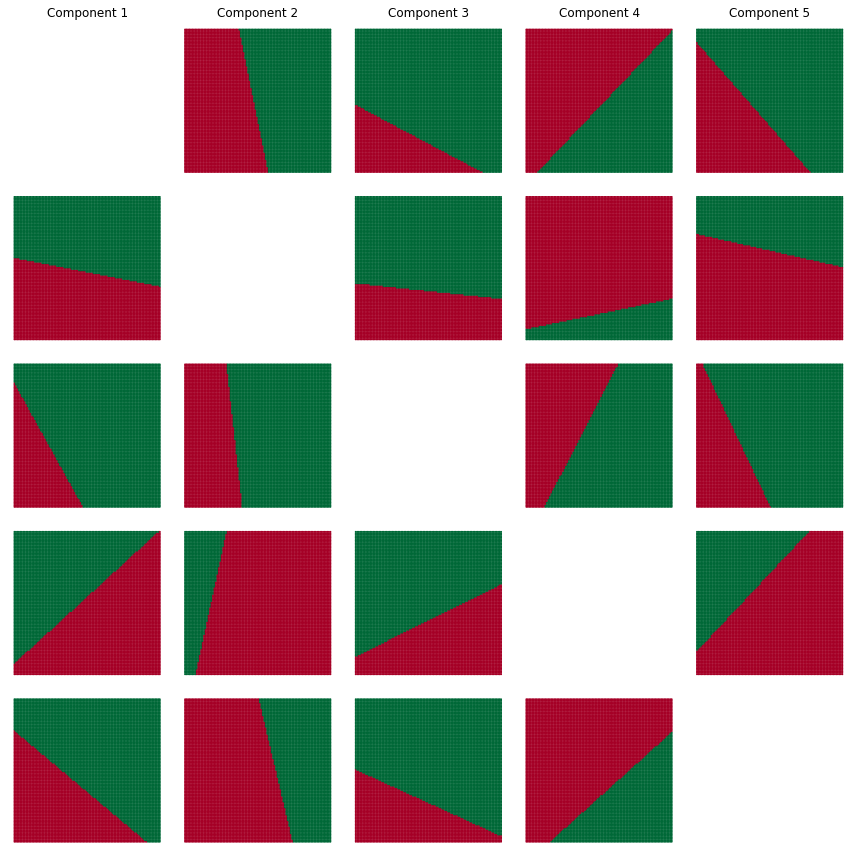

In [102]:
min_vals = list(PCA_components.min()) # axis lower bound
max_vals = list(PCA_components.max()) # axis upper bound
mean_vals = [0.0, 0.0, 0.0, 0.0, 0.0] # mean is zero (result of PCA)

base_grid = np.repeat(mean_vals,grid_size_sq,axis = 0).reshape(grid_size_sq,5) # create base grid that will be adjusted for each graph

cols = ['Component {}'.format(col) for col in range(1, 6)] # column titles
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12)) # 5 by 5 subplots (for each component)

for ax, col in zip(axes[0], cols):
    ax.set_title(col) # add column titles

for i in range(5):
    for j in range(5):
        axes[i,j].axis('off') # turn off all axes
        if i == j:
            continue
        x_grid = np.linspace(min_vals[i], max_vals[i],grid_size) # linspace for x axis
        y_grid = np.linspace(min_vals[j], max_vals[j],grid_size) # linspace for y axis
        x_grid, y_grid = np.meshgrid(x_grid,y_grid) # combine into meshgrid (size grid_size^2)
        x_flat = x_grid.flatten()
        y_flat = y_grid.flatten()
        
        new_grid = base_grid.copy() # start with base grid (all 0's)
        new_grid[:,i] = x_flat # overwrite x axis values
        new_grid[:,j] = y_flat # overwrite y axis values
 
        pred = linear_SVM_PCA.predict(new_grid) # get prediction for new grid
        axes[i,j].scatter(new_grid[:,i],new_grid[:,j],c = pred, s = 1, cmap = "RdYlGn") # make scatterplot, color according to predicted label
        
plt.tight_layout()
plt.savefig("linear_svm_classification.png") # save graph
plt.show()

In [40]:
# #RBF SVM
# rbf_SVM = SVC(kernel = 'rbf')
# rbf_SVM.fit(X_train, Y_train)
# score = rbf_SVM.score(X_test, Y_test)
# print(score)

In [103]:
#Desicion Boundary for 2 Principle components
def decision_boundary(X1, X2, predicted_labels, model, comp1_name, comp2_name):
    colors = []
    for prediction in predicted_labels:
        color = "r" if prediction == 0 else "g"
        colors.append(color)
    H = 1
    X_min = X1.min()-1
    X_max = X1.max()+1
    Y_min = X2.min()-1
    Y_max = X2.max()+1
    XX, YY = np.meshgrid(np.arange(X_min, X_max, H), np.arange(Y_min, Y_max, H))
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, cmap = 'inferno')
    plt.scatter(X1, X2, color = colors)
    plt.xlabel(comp1_name)
    plt.ylabel(comp2_name)

In [ ]:
decision_boundary(pca_components[:, 0], pca_components[:, 1], naive_bayes_PCA_predict, naive_bayes_PCA, "COMP 1", "COMP 2")

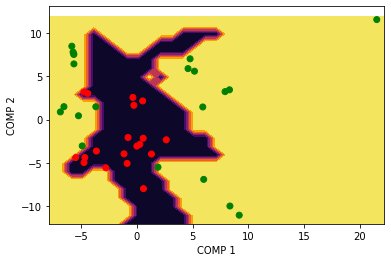

In [116]:
decision_boundary(pca_components[:, 0], pca_components[:, 1], KNN_PCA_predict, KNN_PCA, "COMP 1", "COMP 2")

In [151]:
#Plotting 2 Principle components (Not Decision Boundaries)
def plotting_components(X1, X2, predicted_labels, comp1_name, comp2_name):
    colors = []
    for prediction in predicted_labels:
        color = "r" if prediction == 0 else "g"
        colors.append(color)
#     H = 1
#     X_min = X1.min()-1
#     X_max = X1.max()+1
#     Y_min = X2.min()-1
#     Y_max = X2.max()+1
#     XX, YY = np.meshgrid(np.arange(X_min, X_max, H), np.arange(Y_min, Y_max, H))
#     Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
#     Z = Z.reshape(XX.shape)
    #plt.contourf(XX, YY, Z, cmap = 'inferno')
    plt.scatter(X1, X2, color = colors)
    plt.xlabel(comp1_name)
    plt.ylabel(comp2_name)

In [ ]:
#plotting components' combinations for 3 components. 

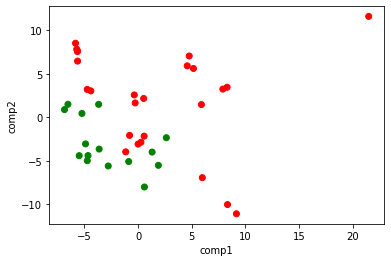

In [154]:
plotting_components(pca_components[:, 0], pca_components[:, 1], KNN_PCA_predict, "comp1", "comp2")

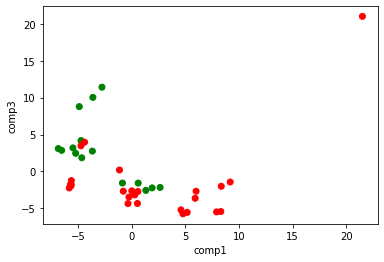

In [156]:
plotting_components(pca_components[:, 0], pca_components[:, 2], KNN_PCA_predict, "comp1", "comp3")

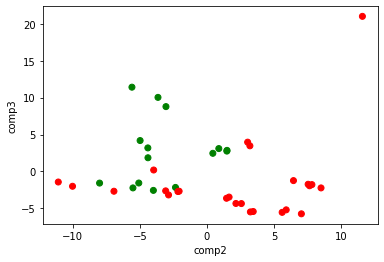

In [158]:
plotting_components(pca_components[:, 1], pca_components[:, 2], KNN_PCA_predict, "comp2", "comp3")

In [73]:
pca_components.shape

(40, 5)

In [74]:
naive_bayes_PCA_predict.shape

(20,)

In [127]:
#Desicion Boundary for 3 Principle components
def decision_boundary_3D(X, Y, coef_, intercept_):
    H = np.linspace(-5,5,30)
    x, y = np.meshgrid(H, H)
    fig = plt.figure()
    Z = lambda x,y: (-intercept_[0]-coef_[0][0]*x -coef_[0][1]*y) / coef_[0][2]
    ax = fig.add_subplot(111, projection = "3d")
    ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
    ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
    ax.plot_surface(x, y, Z(x, y))
    ax.view_init(30, 60)
    plt.show()

In [128]:
X = pca_components
Y = np.array(labels)
#X = X[np.logical_or(Y==0,Y==1)]
#Y = Y[np.logical_or(Y==0,Y==1)]
clf = linear_SVM_PCA.fit(X, Y)

In [148]:
clf.__dict__
clf.coef_
clf.coef_.shape
clf.intercept_.shape

(1,)

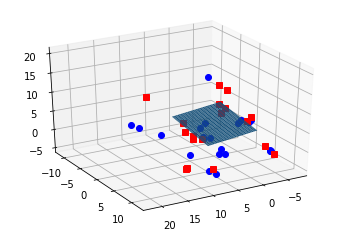

In [131]:
decision_boundary_3D(X, Y, clf.coef_, clf.intercept_)

In [132]:
X = pca_components
Y = np.array(labels)
#X = X[np.logical_or(Y==0,Y==1)]
#Y = Y[np.logical_or(Y==0,Y==1)]
clf_NB = naive_bayes_PCA.fit(X, Y)

In [133]:
clf_NB.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'epsilon_': 3.3962594831898296e-08,
 'classes_': array([0, 1]),
 'theta_': array([[-0.1326688 ,  0.00641824, -1.13331443],
        [ 0.16215075, -0.00784452,  1.38516209]]),
 'sigma_': array([[22.15206849, 29.61467073, 14.048982  ],
        [48.34987744, 29.22982513, 42.37556992]]),
 'class_count_': array([22., 18.]),
 'class_prior_': array([0.55, 0.45])}

In [149]:
coef = np.mean(clf_NB.theta_, axis = 0)
coef.shape
intercept = np.mean(clf_NB.sigma_)
intercept
intercept = np.array([intercept])
coef = coef.reshape(1, -1)
coef.shape
intercept.shape

(1,)

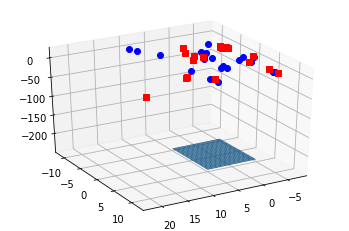

In [150]:
decision_boundary_3D(X, Y, coef, intercept)

In [112]:
Y == 0

array([False, False,  True,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True])

In [32]:
#testing with PCA, 2 components our of set of 3
X_train_2D, X_test_2D, Y_train_2D, Y_test_2D = train_test_split(pca_components_2d, labels, test_size = 0.30)

In [33]:
#Naive Bayes
naive_bayes_PCA = GaussianNB()
naive_bayes_PCA.fit(X_train_2D, Y_train_2D)
score = naive_bayes_PCA.score(X_test_2D, Y_test_2D)
naive_bayes_PCA_predict = naive_bayes_PCA.predict(X_test_2D)
naive_bayes_confusion_matrix = confusion_matrix(Y_test_2D, naive_bayes_PCA_predict)
naive_bayes_f1_score = f1_score(Y_test, naive_bayes_PCA_predict, average = None)
naive_bayes_recall_score = recall_score(Y_test, naive_bayes_PCA_predict, average = None)
naive_bayes_precision_score = precision_score(Y_test, naive_bayes_PCA_predict, average = None)
print("Confusion Matrix for Naive Bayes\n", naive_bayes_confusion_matrix)
print("Accuracy Score", score)
print("Recall Scores", naive_bayes_recall_score)
print("Precision Scores", naive_bayes_precision_score)
print("F1 scores are\n", naive_bayes_f1_score)

Confusion Matrix for Naive Bayes
 [[7 1]
 [4 0]]
Accuracy Score 0.5833333333333334
Recall Scores [1.   0.25]
Precision Scores [0.72727273 1.        ]
F1 scores are
 [0.84210526 0.4       ]


In [34]:
#KNN
KNN_PCA = KNeighborsClassifier()
KNN_PCA.fit(X_train_2D, Y_train_2D)
score = KNN_PCA.score(X_test_2D, Y_test_2D)
KNN_PCA_predict = KNN_PCA.predict(X_test_2D)
KNN_PCA_confusion_matrix = confusion_matrix(Y_test_2D, KNN_PCA_predict)
KNN_PCA_f1_score = f1_score(Y_test_2D, KNN_PCA_predict, average = None)
KNN_PCA_recall_score = recall_score(Y_test_2D, KNN_PCA_predict, average = None)
KNN_PCA_precision_score = precision_score(Y_test_2D, KNN_PCA_predict, average = None)
print("Confusion Matrix for Naive Bayes\n", KNN_PCA_confusion_matrix)
print("Accuracy Score", score)
print("Recall Scores", KNN_PCA_recall_score)
print("Precision Scores", KNN_PCA_precision_score)
print("F1 scores are\n", KNN_PCA_f1_score)

Confusion Matrix for Naive Bayes
 [[4 4]
 [2 2]]
Accuracy Score 0.5
Recall Scores [0.5 0.5]
Precision Scores [0.66666667 0.33333333]
F1 scores are
 [0.57142857 0.4       ]


In [35]:
#Logistic Regression 
log_regression_PCA = LogisticRegression()
log_regression_PCA.fit(X_train_2D, Y_train_2D)
score = log_regression_PCA.score(X_test_2D, Y_test_2D)
log_regression_PCA_predict = log_regression_PCA.predict(X_test_2D)
log_regression_PCA_confusion_matrix = confusion_matrix(Y_test_2D, log_regression_PCA_predict)
log_regression_PCA_f1_score = f1_score(Y_test_2D, log_regression_PCA_predict, average = None)
log_regression_PCA_recall_score = recall_score(Y_test_2D, log_regression_PCA_predict, average = None)
log_regression_PCA_precision_score = precision_score(Y_test_2D, log_regression_PCA_predict, average = None)
print("Confusion Matrix for Naive Bayes\n", log_regression_PCA_confusion_matrix)
print("Accuracy Score", score)
print("Recall Scores", log_regression_PCA_recall_score)
print("Precision Scores", log_regression_PCA_precision_score)
print("F1 scores are\n", log_regression_PCA_f1_score)

Confusion Matrix for Naive Bayes
 [[5 3]
 [3 1]]
Accuracy Score 0.5
Recall Scores [0.625 0.25 ]
Precision Scores [0.625 0.25 ]
F1 scores are
 [0.625 0.25 ]


C:\Users\matpo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#Linear SVM
linear_SVM_PCA = SVC(kernel = 'linear')
linear_SVM_PCA.fit(X_train_2D, Y_train_2D)
score = linear_SVM_PCA.score(X_test_2D, Y_test_2D)
linear_SVM_PCA_predict = linear_SVM_PCA.predict(X_test_2D)
linear_SVM_PCA_confusion_matrix = confusion_matrix(Y_test_2D, linear_SVM_PCA_predict)
linear_SVM_PCA_f1_score = f1_score(Y_test_2D, linear_SVM_PCA_predict, average = None)
linear_SVM_PCA_recall_score = recall_score(Y_test_2D, linear_SVM_PCA_predict, average = None)
linear_SVM_PCA_precision_score = precision_score(Y_test_2D, linear_SVM_PCA_predict, average = None)
print("Confusion Matrix for Naive Bayes\n", linear_SVM_PCA_confusion_matrix)
print("Accuracy Score", score)
print("Recall Scores", linear_SVM_PCA_recall_score)
print("Precision Scores", linear_SVM_PCA_precision_score)
print("F1 scores are\n", linear_SVM_PCA_f1_score)

Confusion Matrix for Naive Bayes
 [[4 4]
 [2 2]]
Accuracy Score 0.5
Recall Scores [0.5 0.5]
Precision Scores [0.66666667 0.33333333]
F1 scores are
 [0.57142857 0.4       ]


In [37]:
# #RBF SVM
# rbf_SVM_PCA = SVC(kernel = 'rbf')
# rbf_SVM_PCA.fit(X_train_2D, Y_train_2D)
# score = rbf_SVM.score(X_test_2D, Y_test_2D)
# rbf_SVM_PCA_predict = rbf_SVM_PCA.predict(X_test_2D)
# rbf_SVM_PCA_confusion_matrix = confusion_matrix(Y_test_2D, rbf_SVM_PCA_predict)
# rbf_SVM_PCA_f1_score = f1_score(Y_test_2D, rbf_SVM_PCA_predict, average = None)
# rbf_SVM_PCA_recall_score = recall_score(Y_test_2D, rbf_SVM_predict, average = None)
# rbf_SVM_PCA_precision_score = precision_score(Y_test_2D, rbf_SVM_PCA_predict, average = None)
# print("Confusion Matrix for Naive Bayes\n", rbf_SVM_PCA_confusion_matrix)
# print("Accuracy Score", score)
# print("Recall Scores", rbf_SVM_PCA_recall_score)
# print("Precision Scores", rbf_SVM_PCA_precision_score)
# print("F1 scores are\n", rbf_SVM_PCA_f1_score)